In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] =(10,10)
title_config = {'fontsize':20, 'y':1.05}

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
X_train = train.iloc[:, 2:].values.astype('float64')
y_train = train['target'].values
X_test = test.iloc[:, 1:].values.astype('float64')

### Likelihood Distribution

Text(0.5, 1.05, 'Likelihood KDE Plots for Negative Class')

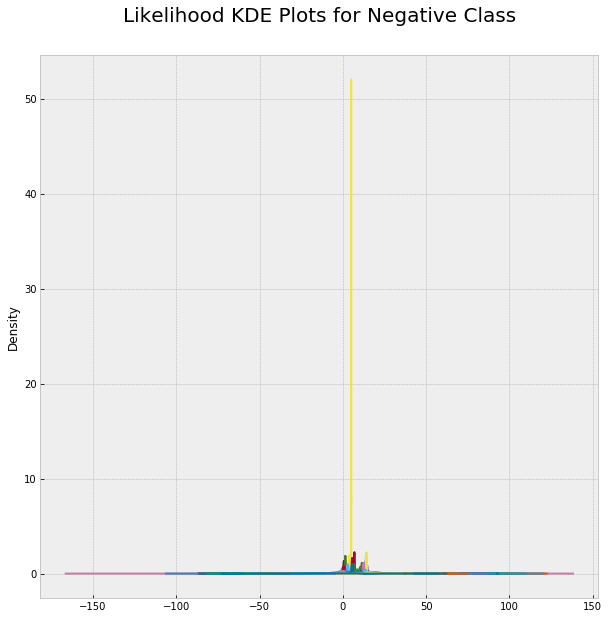

In [7]:
pd.DataFrame(X_train[y_train==0]).plot.kde(ind=100, legend = False)
plt.title("Likelihood KDE Plots for Negative Class", **title_config)

Text(0.5, 1.05, 'Likelihood KDE Plots for Positive Class')

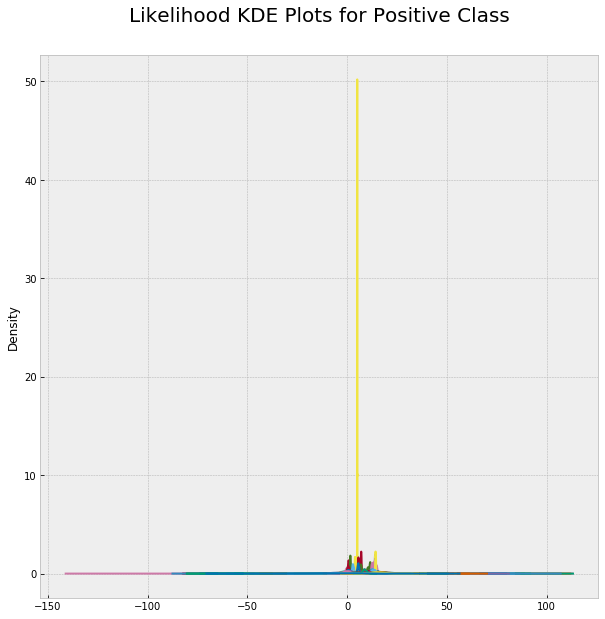

In [8]:
pd.DataFrame(X_train[y_train==1]).plot.kde(ind=100, legend = False)
plt.title("Likelihood KDE Plots for Positive Class", **title_config)

In [8]:
from sklearn.preprocessing import StandardScaler
scaled = pd.DataFrame(StandardScaler().fit_transform(X_train))

Text(0.5, 1.05, 'Likelihood KDE Plots for the Negative Class after Standarization')

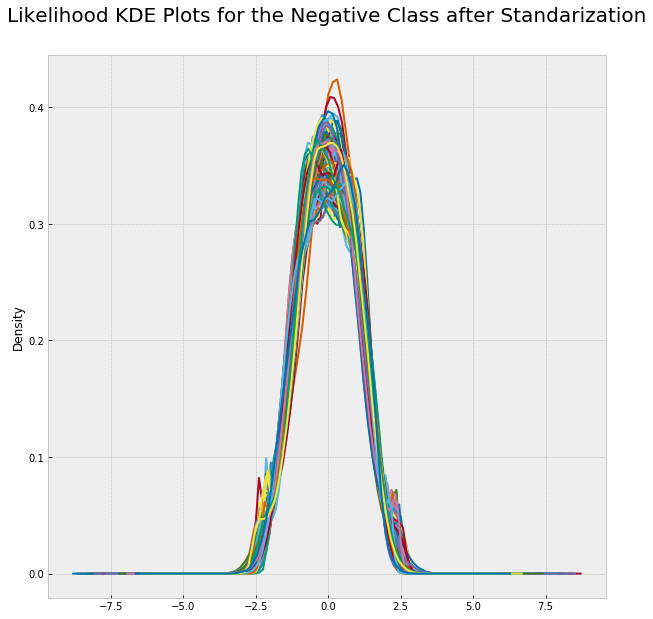

In [10]:
scaled[y_train==0].plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Negative Class after Standarization', **title_config)

Text(0.5, 1.05, 'Likelihood KDE Plots for the Positive Class after Standarization')

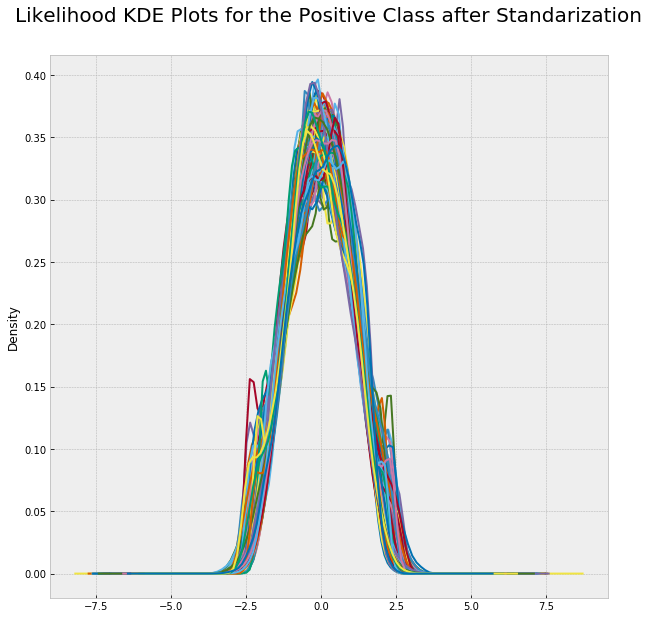

In [11]:
scaled[y_train==1].plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Positive Class after Standarization', **title_config)

In [9]:
from sklearn.preprocessing import QuantileTransformer
transformer = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(X_train))

Text(0.5, 1.05, 'Likelihood KDE Plots for the Negative Class after Quantile Transformation')

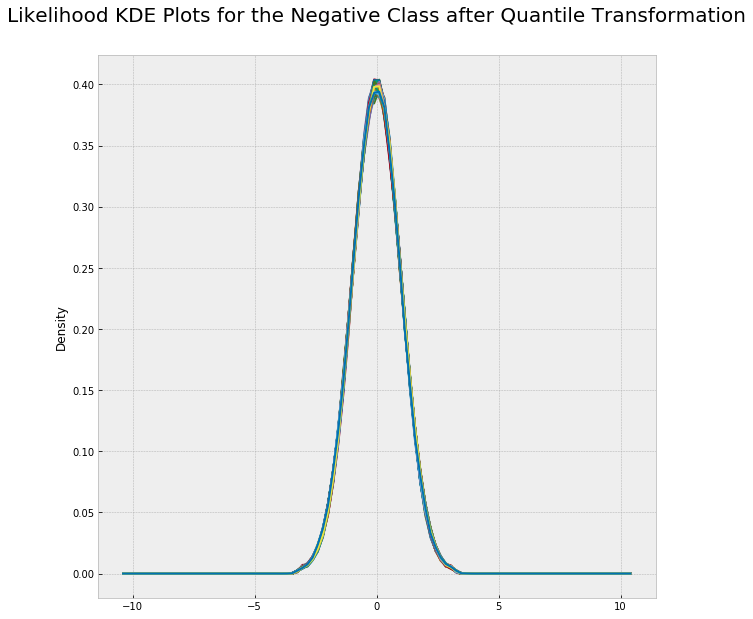

In [10]:
transformer[y_train==0].plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Negative Class after Quantile Transformation', **title_config)

Text(0.5, 1.05, 'Likelihood KDE Plots for the Positive Class after Quantile Transformation')

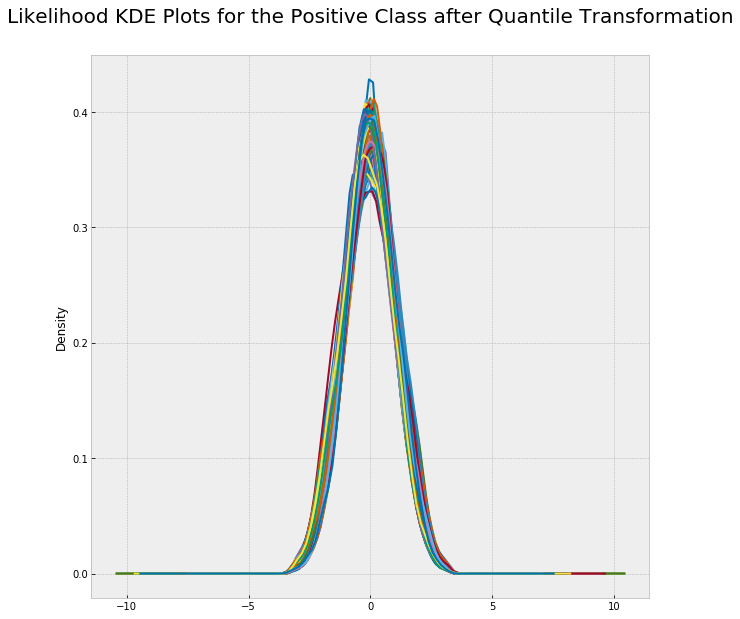

In [11]:
transformer[y_train==1].plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Positive Class after Quantile Transformation', **title_config)

Text(0.5, 1.05, 'Correlation Matrix Plot of the Features')

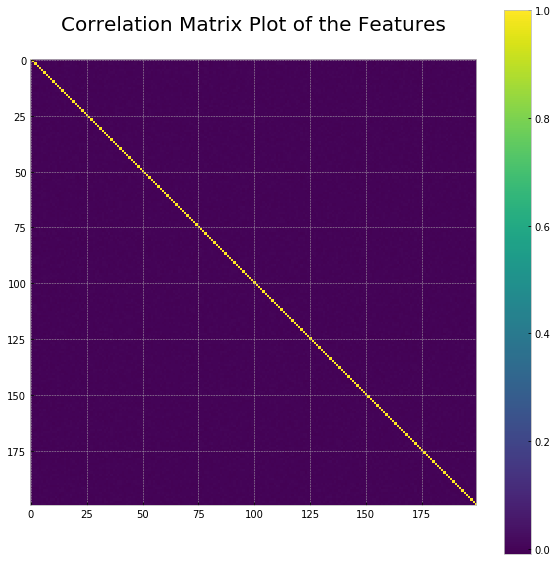

In [12]:
plt.imshow(transformer.corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features', **title_config)

Text(0.5, 1.05, 'Histogram of Sample Mean Differences between Two classes')

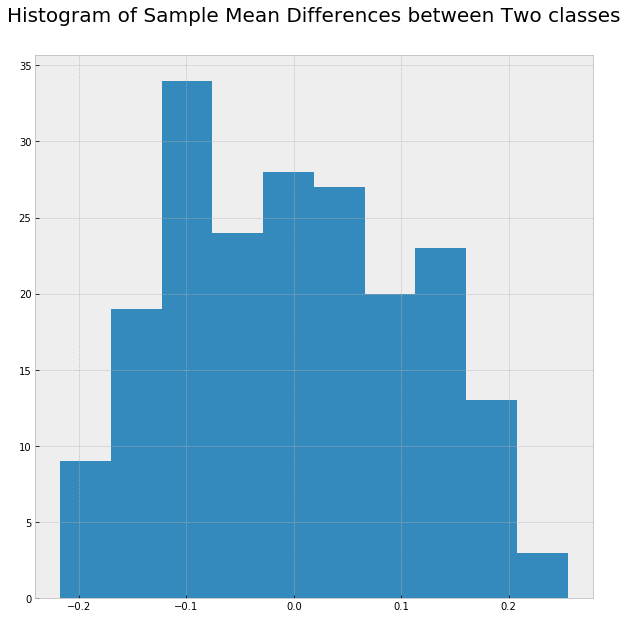

In [13]:
#Histogram for Standard Mean and Variance
plt.hist(transformer[y_train==0].mean() - transformer[y_train==1].mean())
plt.title('Histogram of Sample Mean Differences between Two classes', **title_config)

Text(0.5, 1.05, 'Histogram of Sample Variance Differences between Two classes')

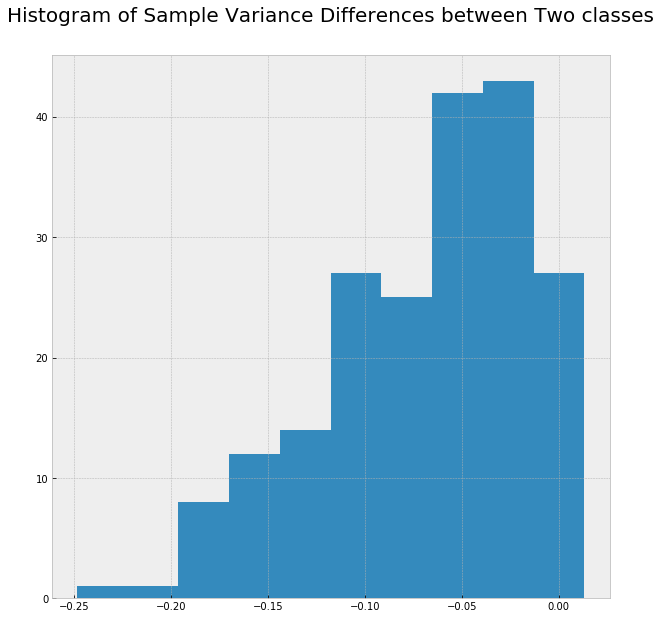

In [14]:
plt.hist(transformer[y_train==0].var() - transformer[y_train==1].var())
plt.title('Histogram of Sample Variance Differences between Two classes', **title_config)

In [15]:
select = (transformer[y_train==0].var() - transformer[y_train==1].var()).nsmallest(2).index

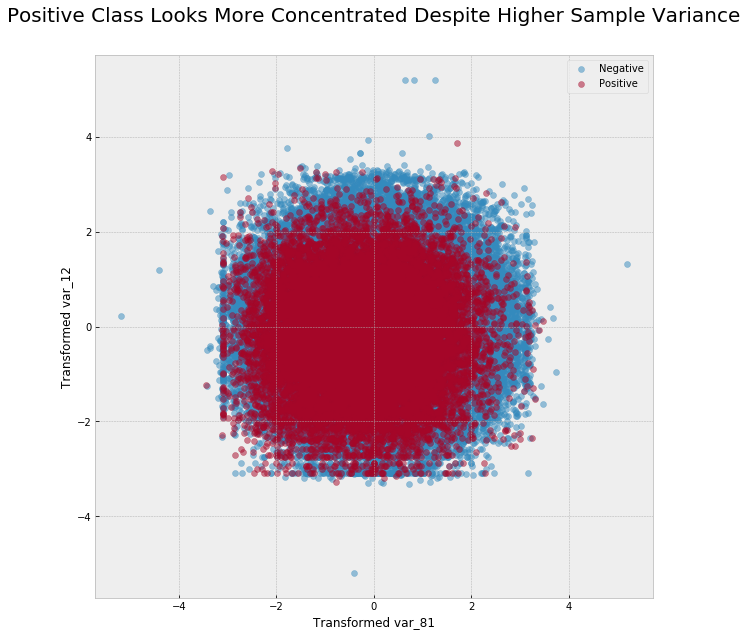

In [16]:
plt.scatter(transformer.loc[y_train==0, select[0]], transformer.loc[y_train==0, select[1]], alpha=0.5, label='Negative')
plt.scatter(transformer.loc[y_train==1, select[0]], transformer.loc[y_train==1, select[1]], alpha=0.5, label='Positive')
plt.xlabel(f'Transformed var_{select[0]}')
plt.ylabel(f'Transformed var_{select[1]}')
plt.title("Positive Class Looks More Concentrated Despite Higher Sample Variance", **title_config)
plt.legend()

In [17]:
transformer.loc[y_train==0, select[0]].mean() - transformer.loc[y_train==1, select[0]].mean()

0.25500260770776983

In [18]:
transformer.loc[y_train==0, select[1]].mean() - transformer.loc[y_train==1, select[1]].mean()

0.22598458381679262

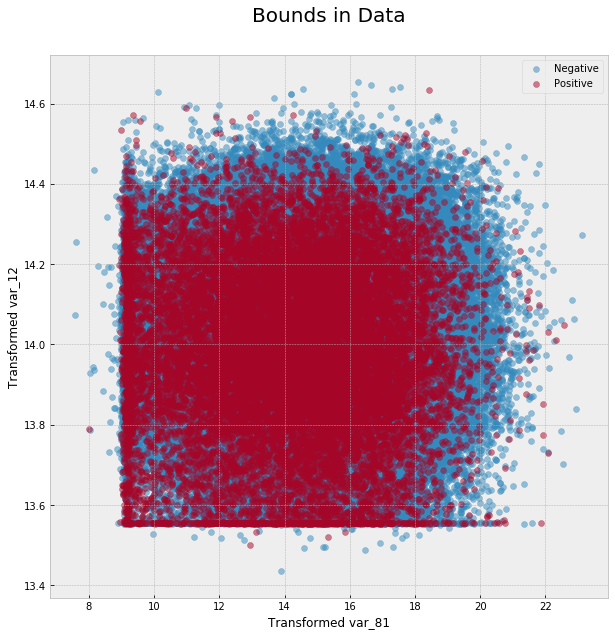

In [19]:
plt.scatter(X_train[y_train==0, select[0]], X_train[y_train==0, select[1]], alpha=0.5, label='Negative')
plt.scatter(X_train[y_train==1, select[0]], X_train[y_train==1, select[1]], alpha=0.5, label='Positive')
plt.xlabel(f'Transformed var_{select[0]}')
plt.ylabel(f'Transformed var_{select[1]}')
plt.title("Bounds in Data", **title_config)
plt.legend()

In [20]:
size0 = (y_train==0).sum()
size1 = y_train.size - size0

In [25]:
x0 = np.random.normal(transformer.loc[y_train==0, select[0]].mean(), transformer.loc[y_train==0, select[0]].std(), size=size0)

In [26]:
y0 = np.random.normal(transformer.loc[y_train==0, select[1]].mean(), transformer.loc[y_train==0, select[1]].std(), size=size0)

In [27]:
x1 = np.random.normal(transformer.loc[y_train==1, select[0]].mean(), transformer.loc[y_train==1, select[0]].std(), size=size1)

In [28]:
y1 = np.random.normal(transformer.loc[y_train==1, select[1]].mean(), transformer.loc[y_train==1, select[1]].std(), size=size1)

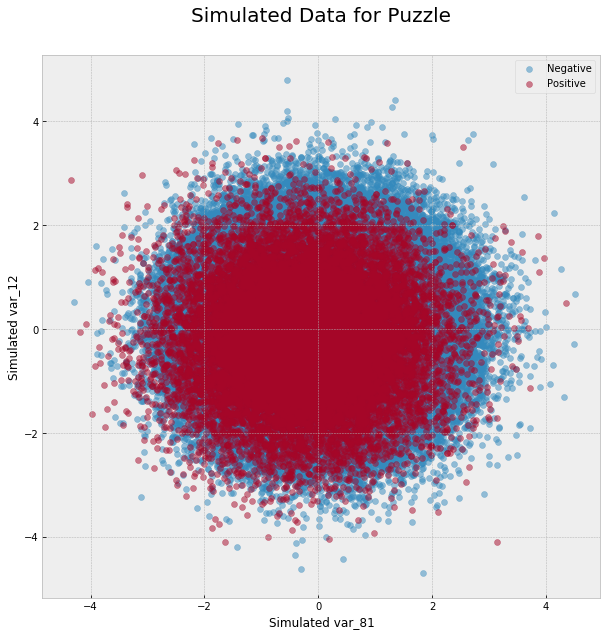

In [30]:
plt.scatter(x0, y0, alpha=0.5, label='Negative')
plt.scatter(x1, y1, alpha=0.5, label='Positive')
plt.xlabel(f'Simulated var_{select[0]}')
plt.ylabel(f'Simulated var_{select[1]}')
plt.title('Simulated Data for Puzzle', **title_config)
plt.legend()

### Train and Evaluate Model

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

In [34]:
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())

In [35]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(X_train)[:,1])

Text(0.5, 1.05, 'Receiver Operating Characteristic Plot')

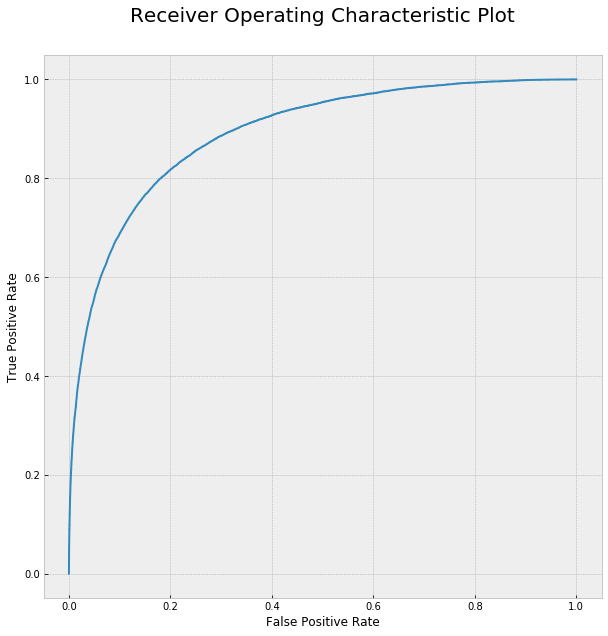

In [38]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)

In [39]:
auc(fpr, tpr)

0.8911238254915314

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10).mean()

0.8893893109425746

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [43]:
model = pipeline.named_steps['gaussiannb']

In [45]:
size = 1000000
size0 = int(size * model.class_prior_[0])
size1 = size - size0

In [50]:
sample0 = np.concatenate([[np.random.normal(i, j, size=size0)]
                          for i, j in zip(model.theta_[0], np.sqrt(model.sigma_[0]))]).T

In [51]:
sample1 = np.concatenate([[np.random.normal(i, j, size=size1)]
                          for i, j in zip(model.theta_[1], np.sqrt(model.sigma_[1]))]).T

In [52]:
X_sample = np.concatenate([sample0, sample1])

In [53]:
y_sample = np.concatenate([np.zeros(size0), np.ones(size1)])

In [54]:
roc_auc_score(y_sample, model.predict_proba(X_sample)[:,1])

0.8904867515916128

In [61]:
submission = pd.read_csv('sample_submission.csv')

In [66]:
submission['target'] = pipeline.predict_proba(X_test)[:,1]

In [67]:
submission.head()

,ID_code,target
0,test_0,0.120411
1,test_1,0.206710
2,test_2,0.187871
3,test_3,0.114263
4,test_4,0.025355


In [68]:
submission.to_csv('submission.csv', index=False)